#Data Understanding

In [1]:
import subprocess
import os
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [30]:
import os
if os.path.split(os.getcwd())[-1]=='notebooks':
    os.chdir("../")

'Your base path is at: '+os.path.split(os.getcwd())[-1]

'Your base path is at: Covid-19_Dash_Board_Implementation'

#Rest API calls

In [31]:
git_pull = subprocess.Popen( "/usr/bin/git pull" , 
                     cwd = os.path.dirname( 'C:/Users/HP/Desktop/Datascience/COVID-19_Dash_Board_Implementation/data/raw/COVID-19/' ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()


print("Error : " + str(error)) 
print("out : " + str(out))

Error : b'The system cannot find the path specified.\r\n'
out : b''


In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [7]:
for each in pd_raw['Country/Region']:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

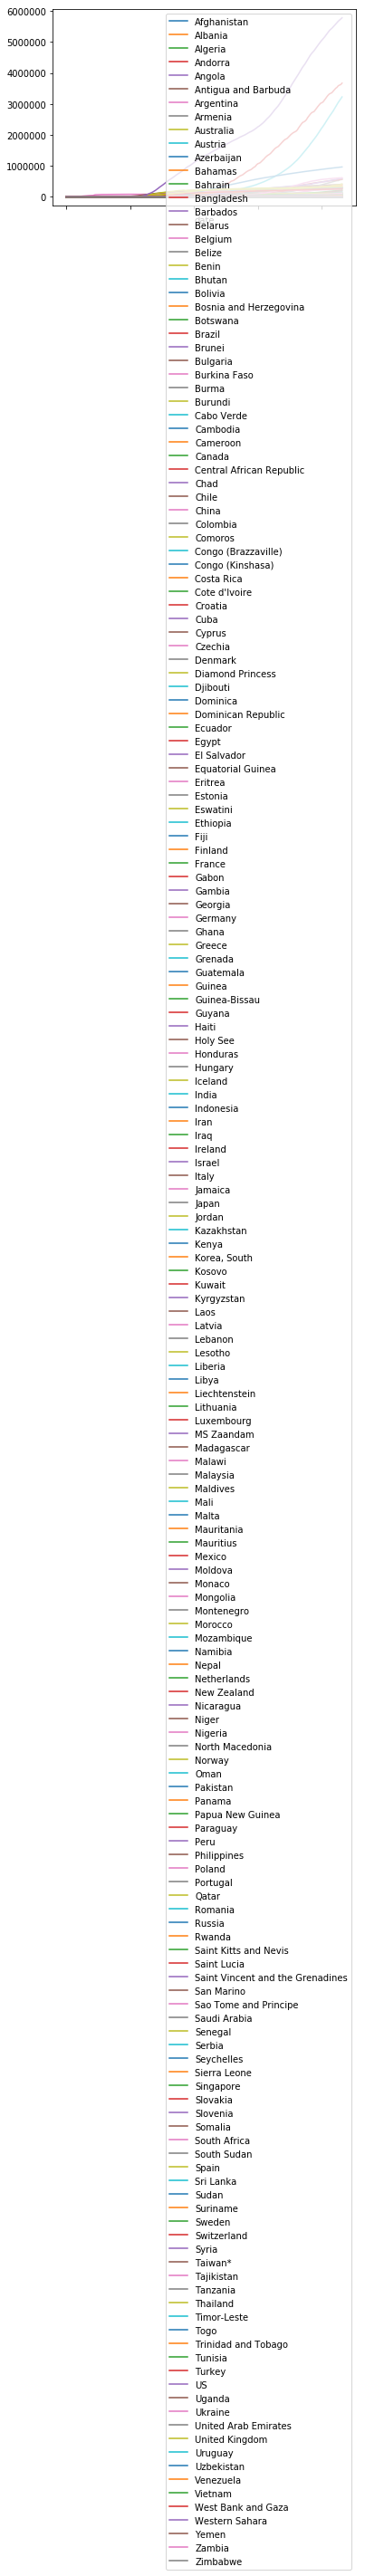

In [8]:
%matplotlib inline
df_plot.set_index('date').plot()

In [9]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [10]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [12]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

Relational data model - defining a primary key
In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key’s main features are:

It must contain a unique value for each row of data.
It cannot contain null values.

In [13]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283


In [14]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a string, important for indexing

In [15]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,no,Albania,0,0,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,no,Algeria,0,0,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,no,Andorra,0,0,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,no,Angola,0,0,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283


In [16]:
test_pd=pd_data_base.set_index(['state','country']).T

In [17]:
test_pd.columns

MultiIndex(levels=[['Alberta', 'Anguilla', 'Anhui', 'Aruba', 'Australian Capital Territory', 'Beijing', 'Bermuda', 'Bonaire, Sint Eustatius and Saba', 'British Columbia', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Chongqing', 'Curacao', 'Diamond Princess', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Guiana', 'French Polynesia', 'Fujian', 'Gansu', 'Gibraltar', 'Grand Princess', 'Greenland', 'Guadeloupe', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Isle of Man', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Manitoba', 'Martinique', 'Mayotte', 'Montserrat', 'New Brunswick', 'New Caledonia', 'New South Wales', 'Newfoundland and Labrador', 'Ningxia', 'Northern Territory', 'Northwest Territories', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Qinghai', 'Quebec', 'Queensland', 'Reunion', 'Saint Barthelemy', 'Saint Pierre and Miquelon', 'Saskatchewan', 'Shaanxi', 'S

In [18]:
test_pd_ri=test_pd.stack(level=(0,1)).reset_index()

In [19]:
pd_relational_model=test_pd_ri.rename(columns={'level_0':'Date',0:'Confirmed'})

In [20]:
pd_relational_model.head()

,Date,state,country,Confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [21]:
pd_relational_model['Date']=pd_relational_model.Date.astype('datetime64[ns]')

In [22]:
pd_relational_model.dtypes

Date         datetime64[ns]
state                object
country              object
Confirmed           float64
dtype: object

In [23]:
df_plot.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [25]:
df_plot=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';')
df_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
